# Esquema General de un clasificador


<img src="figs/fig-diagrama-clasificador.png" width="900">

# Pasos para construir el clasificador

## 1. Modelado del texto
- ### 1.1 Preprocesamiento del texto: incluye remover signos, stopwords, números, es decir, datos que no aporten a la semántica del texto
- ### 1.2 Vectorizar el texto: convertir el texto a una forma que la computadora pueda procesar
    - ### 1.2.1 Calcular la importancia de las componentes (términos) de cada vector: 
        - #### Pesado de términos como Frecuencia de Término (TF) 
        - #### Frecuencia de Término – Frecuencia Inversa de Documento (TF-IDF)

    - ### 1.3 También se puede usar una representación basada en Word Embeddings
        - #### Glove
        - #### Word2Vec
        - #### BERTs

##  2. Entrenar un clasificador para construir el modelo con los datos procesados
###  Usar un clasificador como:
- ###  Red Neuronal
- ###  Support Vector Machine
- ###  K-NN (K vecinos más cercanos)
- ###  etc.

##  3. Evaluar el desempeño del clasificador construido
###  Usar métricas como:
- ###  Precisión
- ###  Recall
- ###  F1-score

##  4. Desplegar el modelo para su uso en un ambiente de pruebas y eventualmente en producción

###  Por ejemplo:
- ###  Aplicación WEB
- ###  API REST
- ###  API

# Instalación de paquetes para Procesamiento de Lenguaje Natural


### NLTK - Paquete para procesamiento de lenguaje natural: Natural Language Tool Kit
```bash
pip install nltk
```

### spaCY - Paquete para procesamiento de lenguaje natural
```bash
pip install setuptools wheel
pip install spacy==3.7.6
```

### scikit-learn - Paquete de Machine Learning 
```bash
pip install scikit-learn
```

### Pandas - Paquete para manipulación de datos y análisis
```bash
pip install pandas
```

# Modelado del texto 


## 1. Preprocesamiento del texto
### El preprocesamiento del texto consiste en curar los datos para la vectorización. Sin embargo, depende del dominio del problema.
### Entre las actividades más comunes se tienen:
- #### Remover acentos, números, símbolos duplicados  y símbolos raros
- #### Convertir a minúsculas
- #### Obtener unigramas, bigramas, trigramas de ***palabras***,  etc. 
- #### Obtener unigramas, bigramas, trigramas de ***caracteres***,  etc.

# 1.0 Lectura de archivos

In [4]:
# Lectura de archivos  TXT
with open('./text_1.txt', 'r', encoding='utf-8') as archivo:
    for linea in archivo:
        print(linea.strip())  # Usamos strip() para quitar el salto de línea al final

El hereje rebelde
En el verde césped del edén, célebre sede de creyentes, el decente Efrén se estremece. Tres deberes del mes lee en el templete del regente: «Defender el vergel del Hereje Rebelde, tener fe en el celeste Jefe de tez perenne, ser excelente». El membrete del Jefe es esplendente, se ve de kermés. Esther se embellece enfrente de Efrén: es de temple terrestre, cree levemente en el deber, el degenere en vez de repelerle le vence. Se ven brevemente, temen se decrete el envejecer, se envenene el éter, se cercene gente, se eleve el jerez. Desde el estrés del Jefe el edén decrece, el excedente le pertenece, se ejercen leyes dementes, se debe beber detergente en vez de leche, ser pelele, ser pedestre, ser deferente; es menester entretenerse en tejer redes, en prender rebeldes. En el Este, trece rehenes perecen de sed; en el frente fenecen de herpes, de peste. El edén se ennegrece, se pretende reprender herejes, perderles.
—¡Eh, Esther, ven!, relee el deber. El Jefe se e

In [2]:
# Lectura de archivos en formato JSON

import pandas as pd
d = pd.read_json("./text_3.json", lines=True)
d.head(10)

,created_at,id,text
0,2020-03-29 06:16:55+00:00,1244146499111374849,"Ya nos pusimos al pedo mi vecina y yo, y pasar..."
1,2020-03-21 05:28:06+00:00,1241235112848752641,Extraño los juegos de Jak and Daxter.
2,2020-03-24 23:50:56+00:00,1242599813520162819,Carajo!
3,2020-03-23 01:43:20+00:00,1241903323369758720,@jrodolfoazul97 @ismeraipons Si estaba muy bue...
4,2020-03-13 17:39:28+00:00,1238520062178459648,"@OdiliaRomero Si verdad, llévame a viajar por ..."
5,2020-03-21 14:46:02+00:00,1241375522413838344,@Cartoo ¡JaJaJa! Yo la vi toda 🤦🏻‍♂️
6,2020-03-25 06:01:39+00:00,1242693106937540609,"Pinches gatos presumido arriba del techo, esta..."
7,2020-03-09 04:10:20+00:00,1236866887541284864,@Chucho_MTY Ya voy para ajuera con Chester y E...
8,2020-03-17 17:43:37+00:00,1239970661465915392,@ElUberTigre JAJAJAJAJAJAJAJA
9,2020-03-19 19:17:24+00:00,1240719038902231041,@AlexisjRamirezp No lo voy a ver por que ya no...


In [47]:
# acceder a los datos del Frame

d["text"][2]

'Carajo!'

In [48]:
#Convertirlos en una lista

texto2 = list (d["text"][2])
print(texto2)


['C', 'a', 'r', 'a', 'j', 'o', '!']


In [50]:
texto_completo = []
for a in d["text"]:
    texto_completo.append(a)
print(texto_completo)


['Ya nos pusimos al pedo mi vecina y yo, y pasaremos la información a los demás y a nuestros roomies, y decidimos cam… https://t.co/bve6gkk4yf', 'Extraño los juegos de Jak and Daxter.', 'Carajo!', '@jrodolfoazul97 @ismeraipons Si estaba muy bueno, muchas gracias bro', '@OdiliaRomero Si verdad, llévame a viajar por Estados Unidos contigo para que se me quite la fantasía.', '@Cartoo ¡JaJaJa! Yo la vi toda 🤦🏻\u200d♂️', 'Pinches gatos presumido arriba del techo, estamos en cuarentena putos :(', '@Chucho_MTY Ya voy para ajuera con Chester y Estopita', '@ElUberTigre JAJAJAJAJAJAJAJA', '@AlexisjRamirezp No lo voy a ver por que ya no quiero enojarme más...', '@V_TrujilloM @lopezobrador_ Ya déjenlo están llenos odio solo por que les quito la mano que les daba de tragar', '@DevilCronos @FaustoLucifer Tú, con gorra.', 'Amigos ya hice el ejercicio de hoy.\n\nBike one hour!!', 'Te odio @nhhotelgroup 😖', '@isaBonhamC Me los hago por ti dd ☺️', 'Mi tipo de persona 🍷🍷🍷', 'Es gratificante ver la solida

# 1.1 Normalización del texto
- ### Eliminar acentos
- ### Eliminar duplicados
- ### Eliminar puntuación
- ### mantiene solo un espacio entre los tokens

In [3]:
# Normalización del texto

import unicodedata
import re
PUNCTUACTION = ";:,.\\-\"'/"
SYMBOLS = "()[]¿?¡!{}~<>|"
NUMBERS= "0123456789"
SKIP_SYMBOLS = set(PUNCTUACTION + SYMBOLS)
SKIP_SYMBOLS_AND_SPACES = set(PUNCTUACTION + SYMBOLS + '\t\n\r ')

def normaliza_texto(input_str,
                    punct=False,
                    accents=False,
                    num=False,
                    max_dup=2):
    """
        punct=False (elimina la puntuación, True deja intacta la puntuación)
        accents=False (elimina los acentos, True deja intactos los acentos)
        num= False (elimina los números, True deja intactos los acentos)
        max_dup=2 (número máximo de símbolos duplicados de forma consecutiva, rrrrr => rr)
    """
    
    nfkd_f = unicodedata.normalize('NFKD', input_str)
    n_str = []
    c_prev = ''
    cc_prev = 0
    for c in nfkd_f:
        if not num:
            if c in NUMBERS:
                continue
        if not punct:
            if c in SKIP_SYMBOLS:
                continue
        if not accents and unicodedata.combining(c):
            continue
        if c_prev == c:
            cc_prev += 1
            if cc_prev >= max_dup:
                continue
        else:
            cc_prev = 0
        n_str.append(c)
        c_prev = c
    texto = unicodedata.normalize('NFKD', "".join(n_str))
    texto = re.sub(r'(\s)+', r' ', texto.strip(), flags=re.IGNORECASE)
    return texto



In [23]:
# Normaliza el texto 
# no hace la separación de tokens si están unidos por un símbolo o signo de puntuación. Realizar un proceso combinado, p. e., tokenización y normalizado 

texto = "En Broadway, a la altura de la calle 113, no sólo se habla en un español nasal y contaminado;también podría decirse que se piensa, se camina y se come en español"

print(f"Texto original: \n\t{texto}\n")
texto_nuevo = normaliza_texto(texto)

#Algunas palabras se juntan "contaminadotambien"

print(texto_nuevo)

texto_nuevo = normaliza_texto(texto, num=True)#En esta normalizacion se quitn los numeros del texto.
#Algunas palabras se juntan "contaminadotambien"
print(texto_nuevo)



Texto original: 
	En Broadway, a la altura de la calle 113, no sólo se habla en un español nasal y contaminado;también podría decirse que se piensa, se camina y se come en español

En Broadway a la altura de la calle no solo se habla en un espanol nasal y contaminadotambien podria decirse que se piensa se camina y se come en espanol
En Broadway a la altura de la calle 113 no solo se habla en un espanol nasal y contaminadotambien podria decirse que se piensa se camina y se come en espanol


# Ejercicio:
- ### Normalizar el texto del archivo text_1.txt que se encuentra en la carpeta "data" 


In [24]:
#Guarda la informacion del archivo "text_1.txt"
texto = []
with open('./text_1.txt', 'r', encoding='utf-8') as archivo:
    for linea in archivo:
        texto.append(normaliza_texto(linea.strip()))# Usamos strip() para quitar el salto de línea al final
print(texto)






['El hereje rebelde', 'En el verde cesped del eden celebre sede de creyentes el decente Efren se estremece Tres deberes del mes lee en el templete del regente «Defender el vergel del Hereje Rebelde tener fe en el celeste Jefe de tez perenne ser excelente» El membrete del Jefe es esplendente se ve de kermes Esther se embellece enfrente de Efren es de temple terrestre cree levemente en el deber el degenere en vez de repelerle le vence Se ven brevemente temen se decrete el envejecer se envenene el eter se cercene gente se eleve el jerez Desde el estres del Jefe el eden decrece el excedente le pertenece se ejercen leyes dementes se debe beber detergente en vez de leche ser pelele ser pedestre ser deferente es menester entretenerse en tejer redes en prender rebeldes En el Este trece rehenes perecen de sed en el frente fenecen de herpes de peste El eden se ennegrece se pretende reprender herejes perderles', '—Eh Esther ven relee el deber El Jefe se excede', '—Preves el tren del semestre', 'M

# 1.2 Tokenización: Obtener las oraciones o  tokens del texto 

## Instalando datos de NLTK

In [4]:
#instalando los modelos, incluidos el español

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Separación de las oraciones del texto

In [12]:
## Cargar el tokenizador de oraciones para el español

tokenizador_oraciones = nltk.data.load('tokenizers/punkt/spanish.pickle')

In [13]:
texto = "De los cerros altos del sur, el de Luvina es el más alto y el más pedregoso. Está plagado de esa piedra gris con la que hacen la cal, pero en Luvina no hacen cal con ella" \
        " ni le sacan ningún provecho. Allí la llaman piedra cruda, y la loma que sube hacia Luvina la nombran Cuesta de la Piedra Cruda. El aire y el sol se han encargado de desmenuzarla," \
        " de modo que la tierra de por allí es blanca y brillante como si estuviera rociada siempre por el rocío del amanecer; aunque esto es un puro decir, porque en Luvina los días son tan" \
        " fríos como las noches y el rocío se cuaja en el cielo antes que llegue a caer sobre la tierra."
print(texto)
tokenizador_oraciones = nltk.data.load('tokenizers/punkt/spanish.pickle') #Cargar el tokenizador de oraciones para el español
oraciones = tokenizador_oraciones.tokenize(texto) #tokenize:toma la cadena completa y la divide en una lista de oraciones.
print(oraciones)


De los cerros altos del sur, el de Luvina es el más alto y el más pedregoso. Está plagado de esa piedra gris con la que hacen la cal, pero en Luvina no hacen cal con ella ni le sacan ningún provecho. Allí la llaman piedra cruda, y la loma que sube hacia Luvina la nombran Cuesta de la Piedra Cruda. El aire y el sol se han encargado de desmenuzarla, de modo que la tierra de por allí es blanca y brillante como si estuviera rociada siempre por el rocío del amanecer; aunque esto es un puro decir, porque en Luvina los días son tan fríos como las noches y el rocío se cuaja en el cielo antes que llegue a caer sobre la tierra.
['De los cerros altos del sur, el de Luvina es el más alto y el más pedregoso.', 'Está plagado de esa piedra gris con la que hacen la cal, pero en Luvina no hacen cal con ella ni le sacan ningún provecho.', 'Allí la llaman piedra cruda, y la loma que sube hacia Luvina la nombran Cuesta de la Piedra Cruda.', 'El aire y el sol se han encargado de desmenuzarla, de modo que l

In [8]:
for o in oraciones: #Imprime cada oración por separado
    print(o)

De los cerros altos del sur, el de Luvina es el más alto y el más pedregoso.
Está plagado de esa piedra gris con la que hacen la cal, pero en Luvina no hacen cal con ella ni le sacan ningún provecho.
Allí la llaman piedra cruda, y la loma que sube hacia Luvina la nombran Cuesta de la Piedra Cruda.
El aire y el sol se han encargado de desmenuzarla, de modo que la tierra de por allí es blanca y brillante como si estuviera rociada siempre por el rocío del amanecer; aunque esto es un puro decir, porque en Luvina los días son tan fríos como las noches y el rocío se cuaja en el cielo antes que llegue a caer sobre la tierra.


## Tokenizar: Obtener los tokens del texto 

In [28]:
from  nltk import word_tokenize #word_tokenize: Esta función sirve para dividir un texto en palabras (tokens), tomando en cuenta signos de puntuación, acentos, etc.

texto = "De los cerros altos del sur, el de Luvina es el más alto y el más pedregoso."

tokens = word_tokenize(texto)
print(tokens)

['De', 'los', 'cerros', 'altos', 'del', 'sur', ',', 'el', 'de', 'Luvina', 'es', 'el', 'más', 'alto', 'y', 'el', 'más', 'pedregoso', '.']


# 1.3 Obtención de características para el clasificador

# N-Gramas


### 1-gramas o Unigramas

- #### Un **unigrama** (puede ser unigrama de palabras o caracteres) es la unidad más básica dentro del análisis de texto en lingüística computacional y procesamiento del lenguaje natural (NLP). 
- #### Consiste en una única palabra o elemento dentro de una secuencia de texto. 
- #### Los unigramas se enfocan en el análisis palabra por palabra de forma individual.
- #### Los unigramas suelen ser útiles en tareas como la clasificación de texto, el análisis de frecuencias de palabras y la identificación de temas clave dentro de un texto.


Por ejemplo, si tomamos el texto:  

**"De los cerros altos del sur el de Luvina es el más alto"**

Los unigramas serían simplemente cada una de las palabras individuales:

1. *De*
2. *los*
3. *cerros*
4. *altos*
5. *del*
6. *sur*
7. *el*
8. *de*
9. *Luvina*
10. *es*
11. *el*
12. *más*
13. *alto*



In [ ]:
from  nltk import word_tokenize

texto = "De los cerros altos del sur el de Luvina es el más alto"

tokens = word_tokenize(texto) #tokenize: Esta función sirve para dividir un texto en palabras (tokens), tomando en cuenta signos de puntuación, acentos, etc.
print(tokens)

['De', 'los', 'cerros', 'altos', 'del', 'sur', 'el', 'de', 'Luvina', 'es', 'el', 'más', 'alto']


# Ejercicio: 

- ## Dado el texto "texto1":
    -  ### Extraer las oraciones
    -  ### Extraer las lista de tokens para cada oración

```python

texto1 = "San Juan Luvina. Me sonaba a nombre de cielo aquel nombre. Pero aquello es el purgatorio. Un lugar moribundo donde se han muerto hasta los perros y ya no hay ni quien le ladre al silencio; pues en cuanto uno se acostumbra al vendaval que allí sopla, no se oye sino el silencio que hay en todas las soledades. Y eso acaba con uno. Míreme a mí. Conmigo acabó. Usted que va para allá comprenderá pronto lo que le digo."
```



In [14]:
#Procesar el texto1: separar las oraciones y extraer la lista  de tokens.

from  nltk import word_tokenize
import pandas as pd
texto1 = "San Juan Luvina. Me sonaba a nombre de cielo aquel nombre. Pero aquello es el purgatorio. Un lugar moribundo donde se han muerto hasta los perros y ya no hay ni quien le ladre al silencio; pues en cuanto uno se acostumbra al vendaval que allí sopla, no se oye sino el silencio que hay en todas las soledades. Y eso acaba con uno. Míreme a mí. Conmigo acabó. Usted que va para allá comprenderá pronto lo que le digo."
oraciones = tokenizador_oraciones.tokenize(texto1)
lista_tokens = []
for o in oraciones:
    print(o)
    tokens = word_tokenize(o)
    lista_tokens.append(tokens)
    #print(tokens)   
print(lista_tokens)



San Juan Luvina.
Me sonaba a nombre de cielo aquel nombre.
Pero aquello es el purgatorio.
Un lugar moribundo donde se han muerto hasta los perros y ya no hay ni quien le ladre al silencio; pues en cuanto uno se acostumbra al vendaval que allí sopla, no se oye sino el silencio que hay en todas las soledades.
Y eso acaba con uno.
Míreme a mí.
Conmigo acabó.
Usted que va para allá comprenderá pronto lo que le digo.
[['San', 'Juan', 'Luvina', '.'], ['Me', 'sonaba', 'a', 'nombre', 'de', 'cielo', 'aquel', 'nombre', '.'], ['Pero', 'aquello', 'es', 'el', 'purgatorio', '.'], ['Un', 'lugar', 'moribundo', 'donde', 'se', 'han', 'muerto', 'hasta', 'los', 'perros', 'y', 'ya', 'no', 'hay', 'ni', 'quien', 'le', 'ladre', 'al', 'silencio', ';', 'pues', 'en', 'cuanto', 'uno', 'se', 'acostumbra', 'al', 'vendaval', 'que', 'allí', 'sopla', ',', 'no', 'se', 'oye', 'sino', 'el', 'silencio', 'que', 'hay', 'en', 'todas', 'las', 'soledades', '.'], ['Y', 'eso', 'acaba', 'con', 'uno', '.'], ['Míreme', 'a', 'mí', '

In [15]:

# Procesar el texto1: separar las oraciones y extraer la lista  de tokens, normalizar el texto y  NO incluir los signos de puntuación.
from  nltk import word_tokenize
texto1 = "San Juan Luvina. Me sonaba a nombre de cielo aquel nombre. Pero aquello es el purgatorio. Un lugar moribundo donde se han muerto hasta los perros y ya no hay ni quien le ladre al silencio; pues en cuanto uno se acostumbra al vendaval que allí sopla, no se oye sino el silencio que hay en todas las soledades. Y eso acaba con uno. Míreme a mí. Conmigo acabó. Usted que va para allá comprenderá pronto lo que le digo."
oraciones = tokenizador_oraciones.tokenize(texto1) #separa las oraciones
lista_tokens = []
for o in oraciones: #Exytrae los tokens de cada oración
    print(o)
    tokens = word_tokenize(o)
    lista_tokens.append(tokens)
    #print(tokens)   
print(lista_tokens)
texto_nomralizado = normaliza_texto(texto1, punct=False)
print(texto_nomralizado)


San Juan Luvina.
Me sonaba a nombre de cielo aquel nombre.
Pero aquello es el purgatorio.
Un lugar moribundo donde se han muerto hasta los perros y ya no hay ni quien le ladre al silencio; pues en cuanto uno se acostumbra al vendaval que allí sopla, no se oye sino el silencio que hay en todas las soledades.
Y eso acaba con uno.
Míreme a mí.
Conmigo acabó.
Usted que va para allá comprenderá pronto lo que le digo.
[['San', 'Juan', 'Luvina', '.'], ['Me', 'sonaba', 'a', 'nombre', 'de', 'cielo', 'aquel', 'nombre', '.'], ['Pero', 'aquello', 'es', 'el', 'purgatorio', '.'], ['Un', 'lugar', 'moribundo', 'donde', 'se', 'han', 'muerto', 'hasta', 'los', 'perros', 'y', 'ya', 'no', 'hay', 'ni', 'quien', 'le', 'ladre', 'al', 'silencio', ';', 'pues', 'en', 'cuanto', 'uno', 'se', 'acostumbra', 'al', 'vendaval', 'que', 'allí', 'sopla', ',', 'no', 'se', 'oye', 'sino', 'el', 'silencio', 'que', 'hay', 'en', 'todas', 'las', 'soledades', '.'], ['Y', 'eso', 'acaba', 'con', 'uno', '.'], ['Míreme', 'a', 'mí', '


### 2-gramas o Bigramas
#### Un bigrama es una secuencia de dos elementos contiguos dentro de un texto. Estos elementos pueden ser palabras, caracteres o unidades fonéticas, dependiendo del tipo de análisis que se realice. En el caso del análisis de texto, los bigramas más comunes son los formados por palabras consecutivas.

#### Cada bigrama refleja la transición entre dos palabras dentro de la oración, y su análisis puede ser útil en áreas como la lingüística computacional, el análisis de texto o los modelos predictivos de lenguaje.

#### Ejemplo:

#### "De los cerros altos del sur, el de Luvina es el más alto"

#### Al crear bigramas de palabras, tomamos dos palabras consecutivas a la vez. Los bigramas para esta frase serían:

1. *De, los*
2. *los, cerros*
3. *cerros, altos*
4. *altos, del*
5. *del, sur*
6. *sur, el*
7. *el, de*
8. *de, Luvina*
9. *Luvina, es*
10. *es, el*
11. *el, más*
12. *más, alto*


In [18]:
# Cálculo de bigramas
from  nltk.util import bigrams # bigrams: Esta función toma una lista de tokens y genera pares consecutivos de tokens (bigramas) a partir de esa lista.

texto = "De los cerros altos del sur el de Luvina es el más alto"
tokens = word_tokenize(texto) #tokenize: Esta función sirve para dividir un texto en palabras (tokens), tomando en cuenta signos de puntuación, acentos, etc.
print(tokens)
bigramas = bigrams(tokens) # Genera los bigramas a partir de la lista de tokens
bigramas = list(bigramas) #Convierte el objeto bigrams en una lista para poder visualizarlo
bigramas

['De', 'los', 'cerros', 'altos', 'del', 'sur', 'el', 'de', 'Luvina', 'es', 'el', 'más', 'alto']


[('De', 'los'),
 ('los', 'cerros'),
 ('cerros', 'altos'),
 ('altos', 'del'),
 ('del', 'sur'),
 ('sur', 'el'),
 ('el', 'de'),
 ('de', 'Luvina'),
 ('Luvina', 'es'),
 ('es', 'el'),
 ('el', 'más'),
 ('más', 'alto')]


### 3-gramas o Trigramas
#### Un trigrama  es una secuencia de tres  elementos contiguos dentro de un texto. 

In [17]:
# Cálculo de trigramas
from  nltk.util import ngrams# ngrams: Esta función toma una lista de tokens y genera n-gramas (en este caso trigramas) a partir de esa lista.

texto = "De los cerros altos del sur el de Luvina es el más alto"
trigramas = ngrams(tokens, 3)# Genera los trigramas a partir de la lista de tokens
trigramas = list(trigramas) 
trigramas

[('Ya', 'nos', 'pusimos'),
 ('nos', 'pusimos', 'al'),
 ('pusimos', 'al', 'pedo'),
 ('al', 'pedo', 'mi'),
 ('pedo', 'mi', 'vecina'),
 ('mi', 'vecina', 'y'),
 ('vecina', 'y', 'yo'),
 ('y', 'yo', ','),
 ('yo', ',', 'y'),
 (',', 'y', 'pasaremos'),
 ('y', 'pasaremos', 'la'),
 ('pasaremos', 'la', 'información'),
 ('la', 'información', 'a'),
 ('información', 'a', 'los'),
 ('a', 'los', 'demás'),
 ('los', 'demás', 'y'),
 ('demás', 'y', 'a'),
 ('y', 'a', 'nuestros'),
 ('a', 'nuestros', 'roomies'),
 ('nuestros', 'roomies', ','),
 ('roomies', ',', 'y'),
 (',', 'y', 'decidimos'),
 ('y', 'decidimos', 'cam…'),
 ('decidimos', 'cam…', 'https'),
 ('cam…', 'https', ':'),
 ('https', ':', '//t.co/bve6gkk4yf')]

# Ejercicio: 

- ## Dado el archivo en formato JSON  "text_3.json" de la carpeta data:
    -  ### Obtener los bigramas sin normalizar 
    -  ### Obtener los bigramas normalizados



In [19]:
#Procesar el texto "text_3.json", separar las oraciones y extraer los bigramas sin normalizar
import pandas as pd
texto_extraido_json = pd.read_json("./text_3.json", lines=True) #Lee el archivo JSON
lista3 = [] #Lista para almacenar los bigramas únicos
for a in texto_extraido_json["text"]: #Itera sobre cada texto en la columna "text"
    tokens = word_tokenize(a) #tokenize: Esta función sirve para dividir un texto en palabras (tokens), tomando en cuenta signos de puntuación, acentos, etc.
    bigramas = bigrams(tokens) # Genera los bigramas a partir de la lista de tokens
    bigramas = list(bigramas) #Convierte el objeto bigrams en una lista para poder visualizarlo
    for i in bigramas:# itera sobre cada bigrama
        if i not in lista3:# Agrega los bigramas únicos a la lista3
            lista3.append(i)# Agrega los bigramas únicos a la lista3
print(lista3)
print(len(lista3))


[('Ya', 'nos'), ('nos', 'pusimos'), ('pusimos', 'al'), ('al', 'pedo'), ('pedo', 'mi'), ('mi', 'vecina'), ('vecina', 'y'), ('y', 'yo'), ('yo', ','), (',', 'y'), ('y', 'pasaremos'), ('pasaremos', 'la'), ('la', 'información'), ('información', 'a'), ('a', 'los'), ('los', 'demás'), ('demás', 'y'), ('y', 'a'), ('a', 'nuestros'), ('nuestros', 'roomies'), ('roomies', ','), ('y', 'decidimos'), ('decidimos', 'cam…'), ('cam…', 'https'), ('https', ':'), (':', '//t.co/bve6gkk4yf'), ('Extraño', 'los'), ('los', 'juegos'), ('juegos', 'de'), ('de', 'Jak'), ('Jak', 'and'), ('and', 'Daxter'), ('Daxter', '.'), ('Carajo', '!'), ('@', 'jrodolfoazul97'), ('jrodolfoazul97', '@'), ('@', 'ismeraipons'), ('ismeraipons', 'Si'), ('Si', 'estaba'), ('estaba', 'muy'), ('muy', 'bueno'), ('bueno', ','), (',', 'muchas'), ('muchas', 'gracias'), ('gracias', 'bro'), ('@', 'OdiliaRomero'), ('OdiliaRomero', 'Si'), ('Si', 'verdad'), ('verdad', ','), (',', 'llévame'), ('llévame', 'a'), ('a', 'viajar'), ('viajar', 'por'), ('por

In [44]:

#Procesar el texto "text_3.json", separar las oraciones y extraer los bigramas normalizados
import pandas as pd
texto_extraido_json = pd.read_json("./text_3.json", lines=True)#Lee el archivo JSON
lista4 = [] #Lista para almacenar los bigramas únicos
for a in texto_extraido_json["text"]:# Itera sobre cada texto en la columna "text"
    a = normaliza_texto(a, punct=False)# Normaliza el texto sin puntuación
    tokens = word_tokenize(a) #tokenize: Esta función sirve para dividir un texto en palabras (tokens), tomando en cuenta signos de puntuación, acentos, etc.
    bigramas = bigrams(tokens)# Genera los bigramas a partir de la lista de tokens
    bigramas = list(bigramas)#Convierte el objeto bigrams en una lista para poder visualizarlo
    for i in bigramas:# itera sobre cada bigrama
        if i not in lista4:# Agrega los bigramas únicos a la lista4
            lista4.append(i)
print(lista4)
print(len(lista4))

[('Ya', 'nos'), ('nos', 'pusimos'), ('pusimos', 'al'), ('al', 'pedo'), ('pedo', 'mi'), ('mi', 'vecina'), ('vecina', 'y'), ('y', 'yo'), ('yo', 'y'), ('y', 'pasaremos'), ('pasaremos', 'la'), ('la', 'informacion'), ('informacion', 'a'), ('a', 'los'), ('los', 'demas'), ('demas', 'y'), ('y', 'a'), ('a', 'nuestros'), ('nuestros', 'roomies'), ('roomies', 'y'), ('y', 'decidimos'), ('decidimos', 'cam'), ('cam', 'httpstcobvegkkyf'), ('Extrano', 'los'), ('los', 'juegos'), ('juegos', 'de'), ('de', 'Jak'), ('Jak', 'and'), ('and', 'Daxter'), ('@', 'jrodolfoazul'), ('jrodolfoazul', '@'), ('@', 'ismeraipons'), ('ismeraipons', 'Si'), ('Si', 'estaba'), ('estaba', 'muy'), ('muy', 'bueno'), ('bueno', 'muchas'), ('muchas', 'gracias'), ('gracias', 'bro'), ('@', 'OdiliaRomero'), ('OdiliaRomero', 'Si'), ('Si', 'verdad'), ('verdad', 'llevame'), ('llevame', 'a'), ('a', 'viajar'), ('viajar', 'por'), ('por', 'Estados'), ('Estados', 'Unidos'), ('Unidos', 'contigo'), ('contigo', 'para'), ('para', 'que'), ('que', 's

 # 1.4 Documentos representados como vectores

#### - En el **modelado de texto**, las palabras o frases se representan de forma **vectorial**, es decir, como vectores (listas de números). 
#### - Esto permite que los algoritmos de aprendizaje automático y procesamiento del lenguaje natural puedan trabajar con el texto, ya que estos modelos necesitan, principalmente, representaciones numéricas  para procesar datos. 
#### - Los métodos más comunes para convertir texto en vectores incluyen técnicas como **bag of words** (unigramas) presencia y ausencia, pesados **TF**, **TF-IDF**, entropía, y otros similares. 
#### - Otra representación popular son los **Word Embeddings** (como Word2Vec, GloVe, BERTs), que capturan tanto la presencia de palabras como su contexto semántico en un espacio numérico.

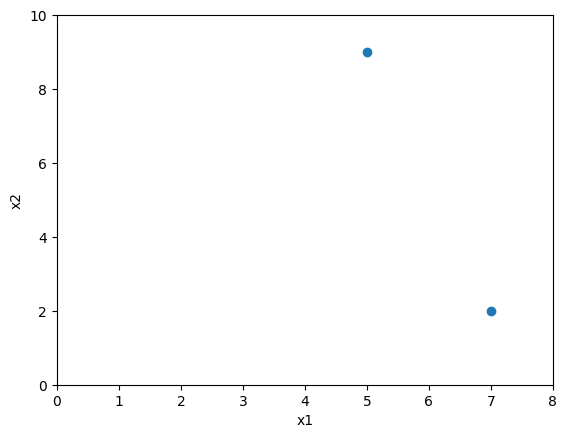

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# dos características por documento: (x1, x2) 
doc1=[5, 9]
doc2=[7, 2]
docs = [doc1, doc2]

x1 = [d[0] for d in docs]
x2 = [d[1] for d in docs]

fig, axis = plt.subplots()
axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.set_xlim(0, max(x1) + 1)
axis.set_ylim(0, max(x2) + 1)
axis.scatter(x1, x2)
plt.show()

## Documentos representados como vectores
- #### Se puede operar sobre los vectores. 
- #### Por ejemplo, calcular la similitud entre los Documentos A y B, por medio de la similitud coseno


# $$ cosine(\theta) = \frac{\vec{A} \cdot \vec{B}}{\lVert \vec{A} \rVert \lVert \vec{B} \rVert} =   \frac{ \sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}} $$

## Modelado del Copus de documentos
- ### cada renglón representa un documento

In [21]:
docs = [
"El cielo es azul",
"El sol es brillante",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"Juan Luis ama a maria",
"Maria ama a Luis",
"la estrella de la mañana y la estrella del atardecer es la misma estrella",
"El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]

# Extracción de vocabulario¶

In [ ]:
# vocabulario
palabras=[]

for d in docs:
    for t in d.split():# separa las palabras por espacio
        palabras.append(t.lower())# convierte a minúsculas
# Generación del vocabulario único
vocabulario=list(sorted(set(palabras)))# lista de palabras únicas ordenadas alfabéticamente

print("tokens:",len(palabras)) #número total de tokens  
print("tokens únicos:", len(vocabulario)) #numero de tokens únicos
vocabulario

tokens: 73
tokens únicos: 35


['a',
 'al',
 'alba',
 'ama',
 'amanecer.',
 'atardecer',
 'atardecer.',
 'azul',
 'brillante',
 'brillante,',
 'cielo',
 'cuando',
 'de',
 'del',
 'el',
 'en',
 'es',
 'estrella',
 'firmamento',
 'juan',
 'la',
 'le',
 'llama',
 'lucero',
 'luis',
 'maria',
 'mañana',
 'misma',
 'podemos',
 'se',
 'sol',
 'tarde',
 'ver',
 'visible',
 'y']

# 1.5 Construcción de la matriz Documento-Término

In [24]:
import numpy as np
# Construcción de la matriz Documento-Término (num_documentos x tamaño_vocabulario)
# Pesado o ponderación de acuerdo a su frecuencia de aparición del término
vsm =  np.zeros((len(docs), len(vocabulario)), dtype=float)# matriz de ceros de tamaño (número de documentos x tamaño del vocabulario)
for k, d in enumerate(docs):# itera sobre cada documento
    for t in d.lower().split(): # convierte a minúsculas y separa las palabras por espacio
        i = vocabulario.index(t) # obtiene el índice de la palabra en el vocabulario
        vsm[k, i] += 1 # incrementa la frecuencia del término en la matriz

In [25]:
#Forma de la matriz resultante
vsm.shape

(8, 35)

### Visualización de los documentos en su representación vectorial 

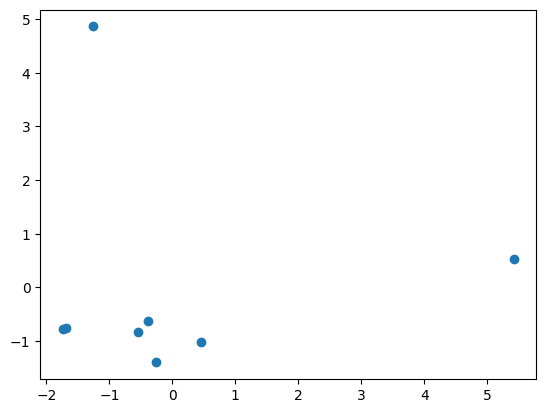

In [ ]:
from sklearn.decomposition import PCA
# Análisis de componentes principales

pca = PCA(n_components=2) # reducir a 2 dimensiones
two_dim = pca.fit_transform(vsm) # transforma la matriz vsm a dos dimensiones
scatter_x = two_dim[:, 0] # primera componente principal
scatter_y = two_dim[:, 1] # segunda componente principal
plt.scatter(scatter_x, scatter_y)
plt.show()

### Ejemplo del cálculo de la similitud entre dos documentos con la similitud coseno

#### $ similitud\_coseno(\theta) = \frac{\vec{A} \cdot \vec{B}}{\lVert \vec{A} \rVert \lVert \vec{B} \rVert} =   \frac{ \sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}} $

In [3]:
import numpy as np

def print_texto(v): # función para imprimir las palabras presentes en el vector v
    # obtiene los índices de las palabras presentes en el vector
    indices = np.flatnonzero(v>0) # índices donde el valor es mayor que 0
    for i in indices: # itera sobre los índices
        print(vocabulario[i], end=" ") # imprime la palabra correspondiente al índice
    print()

def similitud_coseno(a, b):# función para calcular la similitud del coseno entre dos vectores a y b
    return np.sum(a*b)/(np.sqrt(np.sum(np.power(a, 2))) * np.sqrt(np.sum(np.power(b, 2)))) 

a = vsm[1] # segundo documento
b = vsm[2] # tercer documento

print(similitud_coseno(a,b))# similitud entre el segundo y tercer documento
#Esto sifnifica que los documentos son bastante similares en contenido.

print_texto(a)# imprime las palabras del segundo documento
print_texto(b)# imprime las palabras del tercer documento



NameError: name 'vsm' is not defined

# 1.6 Pesado de los términos según su importancia
- #### TF: Term Frequency
- #### TF-IDF: Term Frequency-Inverse Document Frecuency

### Pesado TF: Term Frequency (Frecuencia del Término)


### sklearn: CountVectorizer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer #importar CountVectorizer
vec = CountVectorizer() #crear una instancia de CountVectorizer

#Ajusta el modelo con pesado TF, se obtiene la matriz Documento-Término
X = vec.fit_transform(docs) #


# Features o Componentes o Términos de la matriz 
#Un feature es una palabra única en el vocabulario que se utiliza para representar los documentos en la matriz Documento-Término.
print(vec.get_feature_names_out())

#Tamaño del vocabulario
print("vocabulario: ", len(vec.get_feature_names_out()))

# Matriz  Documento-Término
print(X.toarray())




NameError: name 'docs' is not defined

### Personalizando la construcción de la matriz Documento-Término 

### Unigramas y bigramas

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer# es una clase que convierte una colección de documentos de texto en una matriz de conteo de términos.
    
# usar unigramas y bigramas como features:  ngram_range=(1,2)

vec = CountVectorizer(analyzer="word", ngram_range=(1,2))# crear una instancia de CountVectorizer con unigramas y bigramas
X = vec.fit_transform(docs)  
print(vec.get_feature_names_out())# imprime los términos (unigramas y bigramas)
print(X.toarray()) # Matriz Documento-Término con unigramas y bigramas
print("vocabulario: ", len(vec.get_feature_names_out()))


NameError: name 'docs' is not defined

### Usar un preprocesamiento de datos personalizado

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #es una clase que convierte una colección de documentos de texto en una matriz de conteo de términos.

docs = [
"El cielo es azul 5342534523534 !!!!!?????????!",
"El sol es brillante  ?????!!!!!!",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"JUAN LUIS,  ama MARíA !!!!!",
"María ama a Luis",
"la estrella de la mañana y la estrella del atardecer es la misma estrella",
" El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]


# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    #convierte a minúsculas el texto antes de normalizar
    print("antes: ", texto)
    texto = normaliza_texto(texto.lower())
    print("después:",texto)
    return texto
    
vec = CountVectorizer(analyzer="word", preprocessor=mi_preprocesamiento,  ngram_range=(1,1)) # crear una instancia de CountVectorizer con unigramas y preprocesamiento personalizado
X = vec.fit_transform(docs) 
print(vec.get_feature_names_out()) # imprime los términos (unigramas)
print(X.toarray())
print("vocabulario: ", len(vec.get_feature_names_out()))


antes:  El cielo es azul 5342534523534 !!!!!?????????!
después: el cielo es azul
antes:  El sol es brillante  ?????!!!!!!
después: el sol es brillante
antes:  El sol en el cielo es brillante
después: el sol en el cielo es brillante
antes:  Podemos ver el sol brillante, el sol brillante
después: podemos ver el sol brillante el sol brillante
antes:  JUAN LUIS,  ama MARíA !!!!!
después: juan luis ama maria
antes:  María ama a Luis
después: maria ama a luis
antes:  la estrella de la mañana y la estrella del atardecer es la misma estrella
después: la estrella de la manana y la estrella del atardecer es la misma estrella
antes:   El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
después: el lucero del alba se le llama cuando es visible en el cielo al amanecer el lucero de la tarde es visible en el firmamento al atardecer
['al' 'alba' 'ama' 'amanecer' 'atardecer' 'azul' 'brillante' 'cielo'
 'cuando' 'de' '

# Pesado TF-IDF: Term Frequency-Inverse Document Frequency

- #### Es una técnica utilizada para evaluar la relevancia de una palabra dentro de un documento en relación con un conjunto de documentos (corpus). Combina dos conceptos:

    - ##### TF (Frecuencia de Término): Mide cuántas veces aparece una palabra en un documento, ponderando la importancia de palabras más frecuentes.
    - ##### IDF (Frecuencia Inversa de Documentos): Penaliza las palabras que aparecen en muchos documentos del corpus, dando más peso a las que son más raras o específicas.
    - ##### El resultado es un valor que refleja la importancia de una palabra dentro de un documento, disminuyendo el peso de las palabras comunes y realzando las más distintivas. Es útil para tareas como clasificación de texto, búsqueda de información y extracción de características.



$$TF-IDF(t,d) = TF(t,d) * IDF(t)$$
$$TF(t,d) = f_{(t,d)}$$

$$IDF(t)= \log \frac {N}{d_t + 1}  $$

$$ N:  total\ de\ documentos $$ 
$$ d_t:  número\ de\ documentos \ donde \ aparece \ el \ término \ t $$ 

### sklearn: TfidfVectorizer

In [ ]:
docs = [
"El cielo es azul 5342534523534 !!!!!?????????!",
"El sol es brillante  ?????!!!!!!",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"JUAN LUIS,  ama MARíA !!!!!",
"María ama a Luis",
"la estrella de la mañana y la estrella del atardecer es la misma estrella",
" El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]


from sklearn.feature_extraction.text import TfidfVectorizer # es una clase que convierte una colección de documentos de texto en una matriz de características TF-IDF. 
#donde TF significa "Term Frequency" (Frecuencia de Término) e IDF significa "Inverse Document Frequency" (Frecuencia Inversa de Documento).
#En pocas palabras, TF-IDF es una medida que evalúa la importancia de una palabra en un documento en relación con un conjunto de documentos (corpus).

# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    #convierte a minúsculas el texto antes de normalizar
    print("antes: ", texto)
    texto = normaliza_texto(texto.lower())
    print("después:",texto)
    return texto
    
    
vec_tfidf = TfidfVectorizer(analyzer="word", preprocessor=mi_preprocesamiento,  ngram_range=(1,1))# crear una instancia de TfidfVectorizer con unigramas y preprocesamiento personalizado
X_tfidf = vec_tfidf.fit_transform(docs)
print(vec_tfidf.get_feature_names_out())
print(X_tfidf.toarray())

antes:  El cielo es azul 5342534523534 !!!!!?????????!
después: el cielo es azul
antes:  El sol es brillante  ?????!!!!!!
después: el sol es brillante
antes:  El sol en el cielo es brillante
después: el sol en el cielo es brillante
antes:  Podemos ver el sol brillante, el sol brillante
después: podemos ver el sol brillante el sol brillante
antes:  JUAN LUIS,  ama MARíA !!!!!
después: juan luis ama maria
antes:  María ama a Luis
después: maria ama a luis
antes:  la estrella de la mañana y la estrella del atardecer es la misma estrella
después: la estrella de la manana y la estrella del atardecer es la misma estrella
antes:   El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer.
después: el lucero del alba se le llama cuando es visible en el cielo al amanecer el lucero de la tarde es visible en el firmamento al atardecer
['al' 'alba' 'ama' 'amanecer' 'atardecer' 'azul' 'brillante' 'cielo'
 'cuando' 'de' '

# Ejercicio:
 - ### Obtener la matriz Documento-Término del archivo text_3.json
 - ### Mejorar el preprocesamiento del texto: convertir a minúsculas, separar las oraciones, normalizar el texto, y separar los tokens adecuadamente


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
import pandas as pd
# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    print("antes: ", texto)
    texto = normaliza_texto(texto)
    print("después:",texto)
    return texto
    
# Tokenizador personalizado 

texto_completo = []
#for a in d["text"]:
 #   texto_completo.append(a)
#print(texto_completo)
texto_completo = list (d["text"])
vec_tfidf = TfidfVectorizer(analyzer="word", preprocessor=mi_preprocesamiento, ngram_range=(1,1))
X_tfidf = vec_tfidf.fit_transform(texto_completo)
print(vec_tfidf.get_feature_names_out())
print("vocabulario: ", len(vec_tfidf.get_feature_names_out()))
print(X_tfidf.toarray())


antes:  Ya nos pusimos al pedo mi vecina y yo, y pasaremos la información a los demás y a nuestros roomies, y decidimos cam… https://t.co/bve6gkk4yf
después: Ya nos pusimos al pedo mi vecina y yo y pasaremos la informacion a los demas y a nuestros roomies y decidimos cam httpstcobvegkkyf
antes:  Extraño los juegos de Jak and Daxter.
después: Extrano los juegos de Jak and Daxter
antes:  Carajo!
después: Carajo
antes:  @jrodolfoazul97 @ismeraipons Si estaba muy bueno, muchas gracias bro
después: @jrodolfoazul @ismeraipons Si estaba muy bueno muchas gracias bro
antes:  @OdiliaRomero Si verdad, llévame a viajar por Estados Unidos contigo para que se me quite la fantasía.
después: @OdiliaRomero Si verdad llevame a viajar por Estados Unidos contigo para que se me quite la fantasia
antes:  @Cartoo ¡JaJaJa! Yo la vi toda 🤦🏻‍♂️
después: @Cartoo JaJaJa Yo la vi toda 🤦🏻‍♂️
antes:  Pinches gatos presumido arriba del techo, estamos en cuarentena putos :(
después: Pinches gatos presumido arriba del 

# 1.7 Técnicas para reducir las características (**features**) textuales
#### - **Stemming**.  Corta los finales de las palabras de acuerdo a un conjunto de reglas
#### - **Lematización**. Reducir a la forma normal de la palabra, es decir, verbos a infinitivo; adjetivos a masculino, singular;  sustantivos a singular.
#### - **Remover StopWords**. Eliminar palabras que no se consideran de contenido, es decir, que no aportan a la semántica como preposiciones: a, ante, de, desde, etc.; conjunciones entre otras.


# Stemming

### - El stemming es el proceso de reducir las palabras a su raíz o base sin considerar su contexto gramatical.
### - A menudo, la raíz obtenida no es una palabra real, pero es útil para tareas de procesamiento de lenguaje natural.
### - Algoritmos populares de stemming incluyen el **algoritmo de Porter** y el **algoritmo de Snowball**.
### - Herramientas como **NLTK** incluyen implementaciones de estos algoritmos para varios idiomas.
### - A diferencia de la lematización, el stemming es más rápido pero menos preciso.


In [33]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("spanish")
print(stemmer.stem("mesas"))
print(stemmer.stem("mesa"))

mes
mes


# Lematización 

### - La lematización es el proceso de reducir las palabras a su forma base o "lema", considerando su contexto gramatical.
### - A diferencia del stemming, la lematización analiza la estructura lingüística para obtener una forma más precisa.
### - Ejemplo: "corriendo" y "corrió" se reducen a "correr" (verbo en infinitivo).
### - Herramientas como **spaCy** ofrecen lematización en varios idiomas.
### - **NLTK** y **TextBlob** también permiten realizar lematización.
### - **spaCy** es reconocido por su eficiencia y precisión al considerar el contexto gramatical.


###  Instalación de los modelos de spacy

In [34]:
!python -m spacy download es_core_news_md
#!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/42.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/42.3 MB ? eta -:--:--
     --------------------------------------- 0.5/42.3 MB 721.4 kB/s eta 0:00:58
     --------------------------------------- 0.5/42.3 MB 721.4 kB/s eta 0:00:58
      -------------------------------------- 0.8/42.3 MB 723.7 kB/s eta 0:00:58
      -------------------------------------- 1.0/42.3 MB 734.5 kB/s eta 0:00:57
      -------------------------------------- 1.0/42.3 MB 734.5 kB/s eta 0:00:57
     - ------------------------------------- 1.3/42.3 MB 723.8 kB/s eta 0:00:57
     - ------------------------------------- 1.3/42.3 MB 723.8 kB/s eta 0:00:57
     - ------------------------------------- 1.3/42.3 MB 723.8 kB/s eta 0:00:57
     - ------------------------------------- 1.6/42.3 MB 644.2 kB/s eta 

In [ ]:
import spacy
from spacy.lang.es.examples import sentences 

nlp = spacy.load("es_core_news_md") #carga el modelo de lenguaje español de tamaño mediano
doc = nlp("me comí unas galletas con mis amigos, pero después Juan se comió la última que quedaba") #procesa el texto
print(doc.text) 
print("="*20) 


for token in doc:
    #print(token.text, token.pos_, token.dep_, token.lemma_)
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.is_stop)

me comí unas galletas con mis amigos, pero después Juan se comió la última que quedaba
me yo PRON PRON iobj True
comí comer VERB VERB ROOT False
unas uno DET DET det True
galletas galleta NOUN NOUN nsubj False
con con ADP ADP case True
mis mi DET DET det True
amigos amigo NOUN NOUN obl False
, , PUNCT PUNCT punct False
pero pero CCONJ CCONJ cc True
después después ADV ADV advmod True
Juan Juan PROPN PROPN nsubj False
se él PRON PRON iobj True
comió comer VERB VERB conj False
la el DET DET det True
última último ADJ ADJ amod True
que que PRON PRON obj True
quedaba quedar VERB VERB advcl False


### Stopwords
- #### Las **stopwords** son palabras muy comunes en un idioma que suelen tener poco valor semántico o informativo en el análisis de texto. 
- #### En español, incluyen incluyen artículos, preposiciones y pronombres como  "el", "la", "de", "y", "que", "es", entre otros. 
- #### Estas palabras suelen eliminarse para reducir el ruido, se eliminan durante el preprocesamiento de texto para centrarse en términos más relevantes, facilitando tareas como la clasificación,  análisis de sentimientos, búsqueda y minería de texto.
- #### Herramientas como **NLTK**, **spaCy** y **scikit-learn** ofrecen listas predeterminadas de stopwords.
- #### Las stopwords se adaptan al idioma y a la tarea, por lo que a veces es útil personalizar la lista según el contexto del problema.


## Descarga de las listas de stopwords

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
import nltk
from nltk.corpus import stopwords

_STOPWORDS = stopwords.words("spanish")  # agregar más palabras a esta lista si es necesario

print(_STOPWORDS)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [38]:
docs = [
"El cielo es azul,  5342534523534 !!!!!?????????!",
"El sol es,brillante  ?????!!!!!!",
"El sol en el, cielo,es muy  brillante",
"Podemos ver el sol brillante, el sol brillante",
"JUAN LUIS,  ama MARíA !!!!!",
"María ama a Luis",
"la estrella de la mañana y la estrella del atardecer es la misma estrella",
" El Lucero del alba se le llama cuando es visible en el cielo al amanecer. El Lucero de la tarde es visible en el firmamento al atardecer."
]

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

_STOPWORDS = stopwords.words("spanish")  # agregar más palabras a esta lista si es necesario


# Preprocesamiento personalizado 
def mi_preprocesamiento(texto):
    #convierte a minúsculas el texto antes de normalizar
    tokens = word_tokenize(texto.lower())
    texto = " ".join(tokens)
    texto = normaliza_texto(texto)
    return texto
    
# Tokenizador personalizado 
def mi_tokenizador(texto):
    # Elimina stopwords: palabras que no se consideran de contenido y que no agregan valor semántico al texto
    print("antes: ", texto)
    texto = [t for t in texto.split() if t not in _STOPWORDS]

    print("después:",texto)
    
    return texto


vec_tfidf = TfidfVectorizer(analyzer="word", preprocessor=mi_preprocesamiento, tokenizer=mi_tokenizador,  ngram_range=(1,1))
X_tfidf = vec_tfidf.fit_transform(docs)
print(vec_tfidf.get_feature_names_out())
print("vocabulario: ", len(vec_tfidf.get_feature_names_out()))
print(X_tfidf.toarray())

antes:  el cielo es azul
después: ['cielo', 'azul']
antes:  el sol es brillante
después: ['sol', 'brillante']
antes:  el sol en el cielo es muy brillante
después: ['sol', 'cielo', 'brillante']
antes:  podemos ver el sol brillante el sol brillante
después: ['podemos', 'ver', 'sol', 'brillante', 'sol', 'brillante']
antes:  juan luis ama maria
después: ['juan', 'luis', 'ama', 'maria']
antes:  maria ama a luis
después: ['maria', 'ama', 'luis']
antes:  la estrella de la manana y la estrella del atardecer es la misma estrella
después: ['estrella', 'manana', 'estrella', 'atardecer', 'misma', 'estrella']
antes:  el lucero del alba se le llama cuando es visible en el cielo al amanecer el lucero de la tarde es visible en el firmamento al atardecer
después: ['lucero', 'alba', 'llama', 'visible', 'cielo', 'amanecer', 'lucero', 'tarde', 'visible', 'firmamento', 'atardecer']
['alba' 'ama' 'amanecer' 'atardecer' 'azul' 'brillante' 'cielo' 'estrella'
 'firmamento' 'juan' 'llama' 'lucero' 'luis' 'manan

c:\Users\edwar\miniconda3\envs\RNA\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Convertir los ejemplos de prueba al mismo espacio de representación de datos del conjunto de entrenamiento que aprendió el modelo de texto

In [39]:
doc_test = [
"El sol es muy brillante el día de hoy",
"Podemos ver el cielo azul",
"JUAN LUIS   se fue de paseo",
]

In [ ]:
# El método transform convierte la entrada al espacio de representación del texto modelado con los datos de entrenamiento
doc_test_tfidf = vec_tfidf.transform(doc_test)# la salida muestra la representación TF-IDF de los documentos de prueba en el espacio definido por el modelo entrenado con los documentos originales
#Coords	Values
#(0, 5)	0.7071067811865475 significa que el término "brillante" tiene un peso de 0.7071 en el primer documento de prueba.
#(0, 17)	0.7071067811865475 esto indica que el término "sol" tiene un peso de 0.7071 en el primer documento de prueba.
#(1, 4)	0.5327742358247428 significa que el término "azul" tiene un peso de 0.5327 en el segundo documento de prueba.
print(doc_test_tfidf)

antes:  el sol es muy brillante el dia de hoy
después: ['sol', 'brillante', 'dia', 'hoy']
antes:  podemos ver el cielo azul
después: ['podemos', 'ver', 'cielo', 'azul']
antes:  juan luis se fue de paseo
después: ['juan', 'luis', 'paseo']
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (3, 21)>
  Coords	Values
  (0, 5)	0.7071067811865475
  (0, 17)	0.7071067811865475
  (1, 4)	0.5327742358247428
  (1, 6)	0.3852983790831255
  (1, 16)	0.5327742358247428
  (1, 19)	0.5327742358247428
  (2, 9)	0.7664298449085388
  (2, 12)	0.6423280258820045


### Inspección de los datos transformados

In [43]:
print("tamaño de la matriz de prueba: (ejemplos, tamaño de features) ", doc_test_tfidf.shape) #los documentos de prueba se representan en el mismo espacio que los documentos de entrenamiento
#Recordar que los features son las palabras únicas del vocabulario obtenido en el entrenamiento
n_sample=0 # índice del documento de prueba a mostrar
print("\ntexto original: ")
print(doc_test[n_sample])
#type(vec_tfidf.inverse_transform(X_test_tfidf[n_sample]))

print("\ntexto del espacio de representación: ")
print(" ".join(vec_tfidf.inverse_transform(doc_test_tfidf[n_sample])[0].tolist()))# muestra las palabras presentes en el documento de prueba n_sample según el modelo entrenado


tamaño de la matriz de prueba: (ejemplos, tamaño de features)  (3, 21)

texto original: 
El sol es muy brillante el día de hoy

texto del espacio de representación: 
brillante sol


# <font color="white">Preparación de los conjuntos de datos para el entrenamiento y evaluación</font>


# 1.1 Cargar el conjunto de datos

In [ ]:
import pandas as pd
# Lee el archivo de datos: el formato es una linea es un ejemplo de entrenamiento.
# dataset = pd.read_json("./data/data_emotions_es.json", lines=True)
dataset = pd.read_json("./data_aggressiveness_es.json", lines=True) #Lee el archivo JSON línea por línea


#conteo de clases
print("Total de ejemplos de entrenamiento") #

#primeros 30 textos
print(dataset["text"].to_list()[:30]) #

print(dataset.klass.value_counts()) #

# Extracción de los textos en arreglos de numpy
X = dataset['text'].to_numpy() 

# Extracción de las etiquetas o clases de entrenamiento

Y = dataset['klass'].to_numpy()


Total de ejemplos de entrenamiento
['@USUARIO Lo que tu no respetas es al país HDP', 'no sé cómo pedirle a la señora que me ayuda a desacomodar los libros que no use mi librero como un mueble cualquiera sin parecer una loca', '¿Cómo hacer entender en el grupo de la familia que me cagan las putas cadenas de oración, imágenes de Piolin y videos "chistosos"?', 'Jaja, perdón por esta vida loca. Nos vemos pronto, bestia.', 'Pero que putas hacen esos argentinos hablando como españoles.¿?', 'Sólo a las PUTAS MOCOSAS GORDAS Y feas les gusta ese aleman xdxd Si a mi me das un puto perro asco, imagínate el... <URL>', '@USUARIO Emilio Gamboa? EPN? Manlio?? Olvídenlo son tantos los hdp q imposible saber cuál fué?  😜😜😜', '¿Porqué no te fuiste a Cruz Azul?  La Rebel ya te quiere partir la madre por muerto. Yo ahí nomás te aviso,un abrazo.', 'Chingue a su madre pinche profesor@ de @USUARIO', 'Este chavo que está cortándose el cabello me hace ojitos! Y yo tan joto que no le hago caso 🤦🏾\u200d♂️', 'Que 

# Codificar las categorías utilizando un esquema de codificación ordinal.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #   crear una instancia de LabelEncoder
# Normalizar las etiquetas a una codificación ordinal para entrada del clasificador
Y_encoded= le.fit_transform(Y) #   ajusta y transforma las etiquetas a valores numéricos

print("Clases codificadas:")
print(le.classes_)

n=5
print("Clases codificadas:")
print(Y[:n], Y_encoded[:n]) #   muestra las primeras n etiquetas originales y codificadas


Clases codificadas:
['aggressive' 'nonaggressive']
Clases codificadas:
['aggressive' 'nonaggressive' 'nonaggressive' 'nonaggressive'
 'nonaggressive'] [0 1 1 1 1]


### Decodificar las categorías en  codificación ordinal a la categoría original.

In [46]:
# Arreglo con  resultados de las clases en la categoría codificada. 
le.inverse_transform([0, 0 , 1])

array(['aggressive', 'aggressive', 'nonaggressive'], dtype=object)

## 1.2 Preparación de los conjuntos de datos  (datasets)

## Hay  dos formas principales de evaluación de modelos: partición y validación cruzada:

### 1. **Evaluación por partición (separación de datasets en train-test)**:
   - #### Dividir el conjunto de datos en dos subconjuntos: uno para entrenar (train) y otro para probar (test).
   - #### Proceso simple y rápido, adecuado para conjuntos de datos grandes.
   - #### Riesgo de que la evaluación dependa de cómo se haya dividido el conjunto, lo que puede generar un rendimiento sesgado.
   - #### Se utiliza un porcentaje fijo de datos para entrenar y el resto para evaluar, como 70%/30% o 80%/20%.
   
### 2. **Evaluación por validación cruzada**:
   - #### El conjunto de datos se divide en múltiples subconjuntos (folds) y se entrena el modelo varias veces, usando cada fold como conjunto de prueba y el resto como entrenamiento.
   - #### Más robusta y fiable, ya que la evaluación se basa en múltiples particiones, lo que reduce el sesgo.
   - #### Ayuda a obtener una estimación más precisa del rendimiento del modelo en datos no vistos.
   - #### La variante más común es la **k-fold cross-validation**, donde los datos se dividen en *k* subconjuntos.


      <img src="figs/fig_cross-validation.jpg" width="800">


###### Fuente: https://es.wikipedia.org/wiki/Validación_cruzada

### **Ambos métodos tienen ventajas y desventajas, siendo la validación cruzada más precisa pero costosa en términos computacionales.**



# Separación de datos por partición

In [47]:
# Dividir el conjunto de datos en conjunto de entrenamiento (80%) y conjunto de pruebas: test_size = 0.2 (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y_encoded, test_size=0.2, stratify= Y_encoded, random_state=42)

In [ ]:
#Mostrar los primeros N ejemplos con sus clases
samples=10
X_train[:samples], Y_train[:samples], le.inverse_transform(Y_train[:samples]), len(X_train), len(X_test)

(array(['Graciaspor incitar al odio y a los feminicidios. Aprende: NUNCA perdemos nuestros derechos. #YoSoyMara',
        'No hay mayor mamá más  luchona y cabrona que Cristiano Ronaldo ☝ #halamadrid',
        'Somos bien hdp con ella, la verdad. A veces hasta me siento mal de ser así, pero todos dicen que se lo gana. 😂😌',
        '@USUARIO Que cabron ver La publicidad de Megadeth por toda Baja California, recuerdo pasar por un puente de Mexicali y ver a todo color a mi banda!🤘🏼',
        'Ahora si te la mamaste :p pero se respeta tu opinión. Tambien quien sabe en que plan ibas, o que esperabas. A mi me encantó',
        'yo soy una buena persona SIN MAMAR ok? así que yo no se porqué pitos me pasan cosas tan de la verga',
        'En ningún momento se me salió el joto que llevo dentro jajaja. Quedamos en comenzar a entrenar juntos.',
        'Se me ocurrió una idea muy loca! La neta no se si se haga realidad pero bueh!',
        '@USUARIO Tú también estorbabas cuándo eras una gorda, po

# Separación de datos para validación cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

#tamaño de los k-folds

skf = StratifiedKFold(n_splits=5)  
for k, (index_train, index_test) in enumerate(skf.split(X, Y_encoded), start=1):
    
    # index_train y index_test obtienen los índices de las muestras para procesar
    X_train_cv, X_test_cv = X[index_train], X[index_test]

    Y_train_cv, Y_test_cv = Y_encoded[index_train], Y_encoded[index_test]

    print("k = {}".format(k))
    print('train [num. clases]-  {}   |   test [num. clases]-  {}'.format(
        np.bincount(Y_train_cv), np.bincount(Y_test_cv) ))


k = 1
train [num. clases]-  [1181 2924]   |   test [num. clases]-  [296 731]
k = 2
train [num. clases]-  [1181 2924]   |   test [num. clases]-  [296 731]
k = 3
train [num. clases]-  [1182 2924]   |   test [num. clases]-  [295 731]
k = 4
train [num. clases]-  [1182 2924]   |   test [num. clases]-  [295 731]
k = 5
train [num. clases]-  [1182 2924]   |   test [num. clases]-  [295 731]


# <font color="white">Ejercicio: </font>


###  1. Preprocesar los datos para la creación de la matriz de documento-término, usar un pesado TF-IDF, y unigramas

###  2. Preparar los conjuntos de datos para el entrenamiento con un partición train-test: dividir 70% para entrenamiento y 30% para test


In [ ]:
#cargar el conjunto de datos "data_aggressiveness_es.json" 
import pandas as pd
archivo = pd.read_json("./data_aggressiveness_es.json", lines=True)
archivo


#Preprocesar los datos: convertir a minúsculas, borrar puntuación, etc.
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
texto_completo = []
for a in archivo["text"]:
    texto_completo.append(normaliza_texto(a.lower(), punct=False))# Normaliza el texto sin puntuación
print(texto_completo)

#Codificar las clases si no son categorías ordinales.

le = LabelEncoder()  # crear una instancia de LabelEncoder
Y = archivo['klass'].to_numpy()  # Extracción de las etiquetas o clases de entrenamiento
Y_encoded= le.fit_transform(Y)  #   ajusta y transforma las etiquetas a valores numéricos
print("Clases codificadas:")
print(le.classes_)

# Normalizar las etiquetas a una codificación ordinal para entrada del clasificador
Y_encoded= le.fit_transform(Y)  #   ajusta y transforma las etiquetas a valores numéricos
print("Clases codificadas:")
print(Y[:10], Y_encoded[:10])  #   muestra las primeras n etiquetas originales y codificadas

#Separar los datos 70% entrenamiento y 30% test
X_train, X_test, Y_train, Y_test =  train_test_split(texto_completo, Y_encoded, test_size=0.3, stratify= Y_encoded, random_state=42)
print("Número de ejemplos de entrenamiento: ", len(X_train))
print("Número de ejemplos de test: ", len(X_test))  

#Contruir la matriz de documento-término  para el conjunto de entrenamiento y para el conjunto de test 
vec_tfidf = TfidfVectorizer(analyzer="word", ngram_range=(1,2))  # crear una instancia de TfidfVectorizer con unigramas y
X_train_tfidf = vec_tfidf.fit_transform(X_train)  # Ajusta el modelo con el conjunto de entrenamiento
X_test_tfidf = vec_tfidf.transform(X_test)  # Convierte el conjunto de test al espacio definido por el modelo entrenado
print("Tamaño de la matriz de entrenamiento: (ejemplos, tamaño de features) ", X_train_tfidf.shape) #  



['@usuario lo que tu no respetas es al pais hdp', 'no se como pedirle a la senora que me ayuda a desacomodar los libros que no use mi librero como un mueble cualquiera sin parecer una loca', 'como hacer entender en el grupo de la familia que me cagan las putas cadenas de oracion imagenes de piolin y videos chistosos', 'jaja perdon por esta vida loca nos vemos pronto bestia', 'pero que putas hacen esos argentinos hablando como espanoles', 'solo a las putas mocosas gordas y feas les gusta ese aleman xdxd si a mi me das un puto perro asco imaginate el url', '@usuario emilio gamboa epn manlio olvidenlo son tantos los hdp q imposible saber cual fue 😜😜', 'porque no te fuiste a cruz azul la rebel ya te quiere partir la madre por muerto yo ahi nomas te avisoun abrazo', 'chingue a su madre pinche profesor@ de @usuario', 'este chavo que esta cortandose el cabello me hace ojitos y yo tan joto que no le hago caso 🤦🏾\u200d♂️', 'que loca la rogelia no queriendo compartir la chiluda #masterchefmx', '

## 